In [1]:
import numpy as np,pandas as pd,seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv("creditcard.csv")

## Dataset description

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Handling missing values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Handing duplicate values

In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(283726, 31)

### here after dropping the duplicate rows the number of rows got reduced from 284807 to 283726 (1081 rows)

## Handling outliers

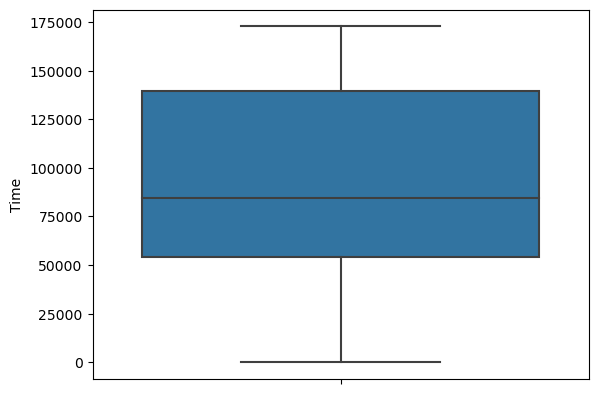

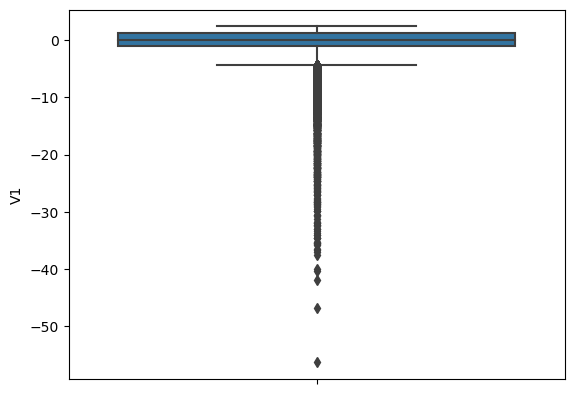

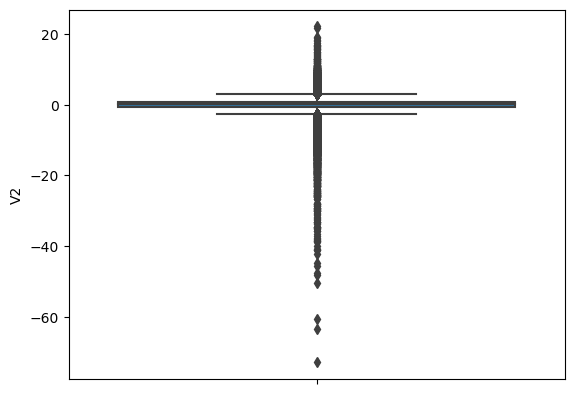

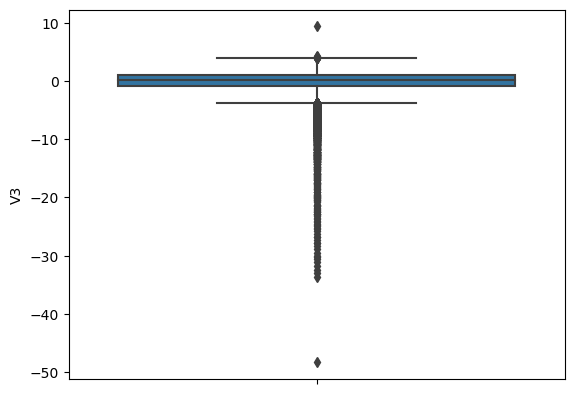

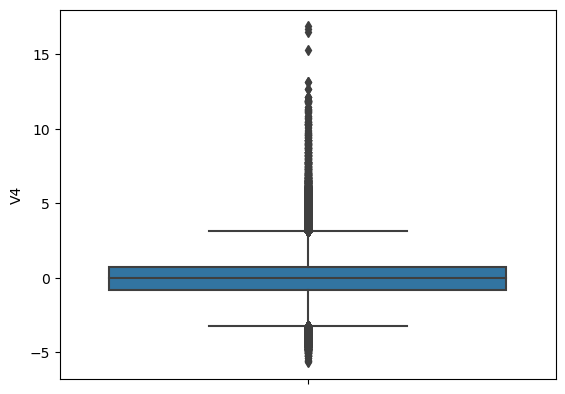

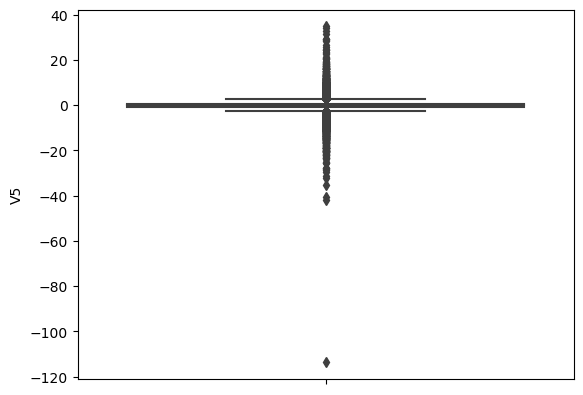

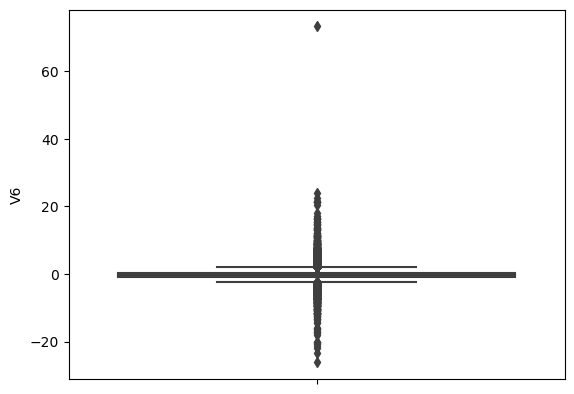

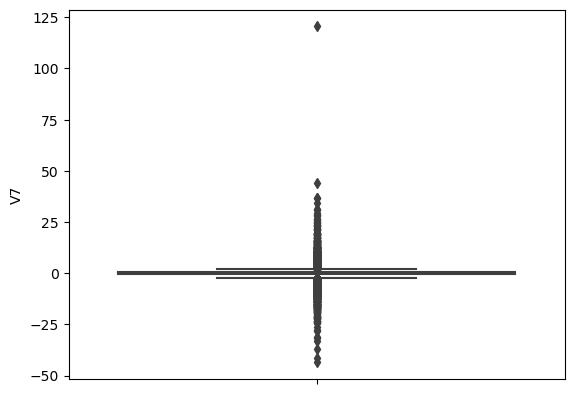

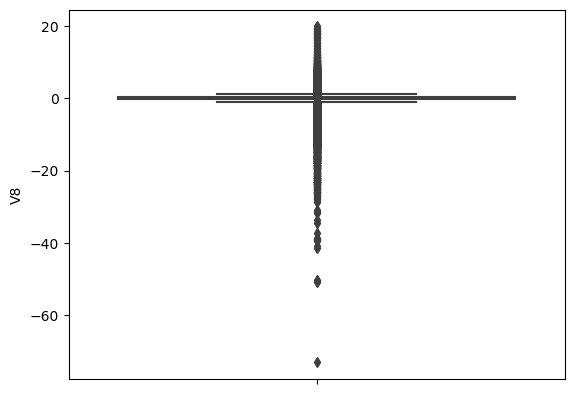

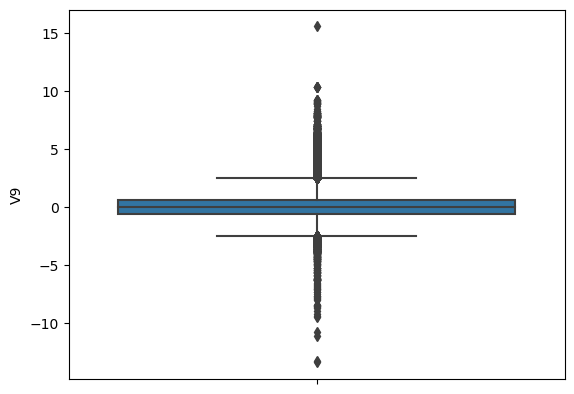

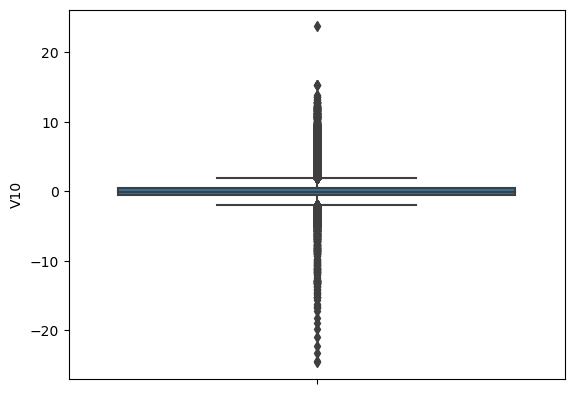

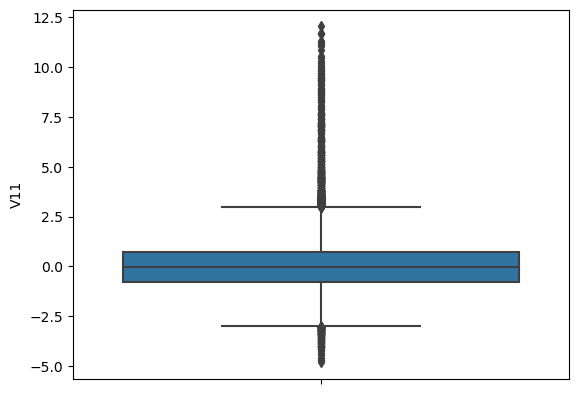

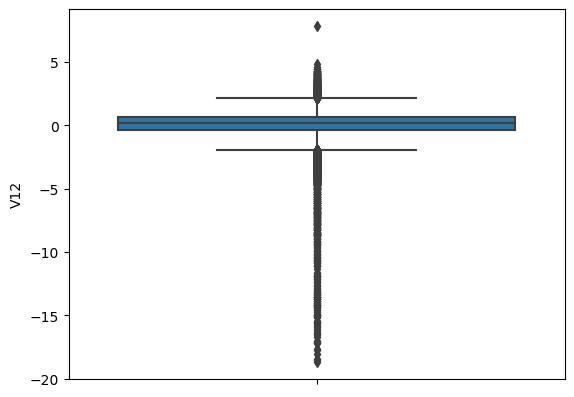

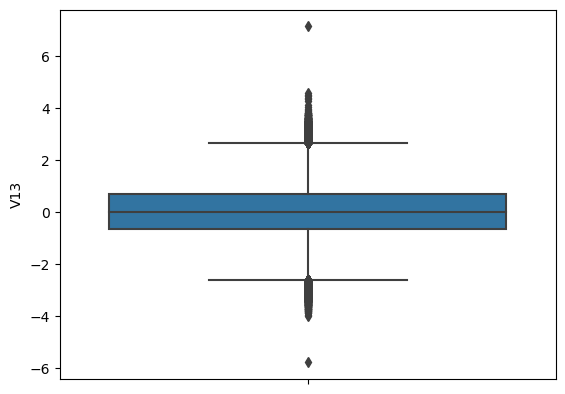

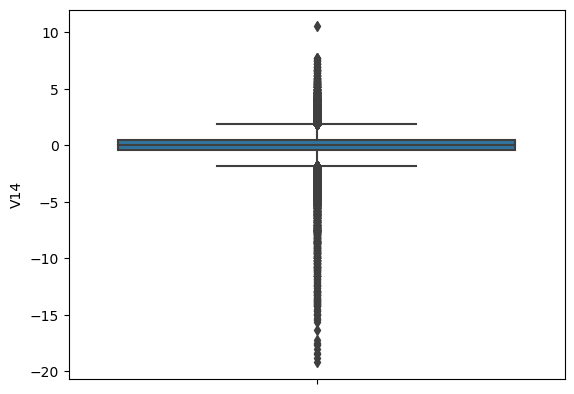

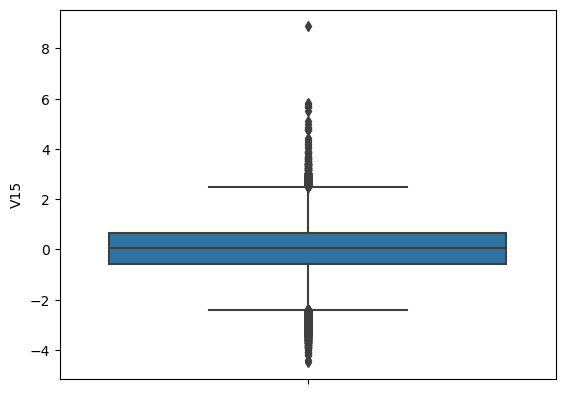

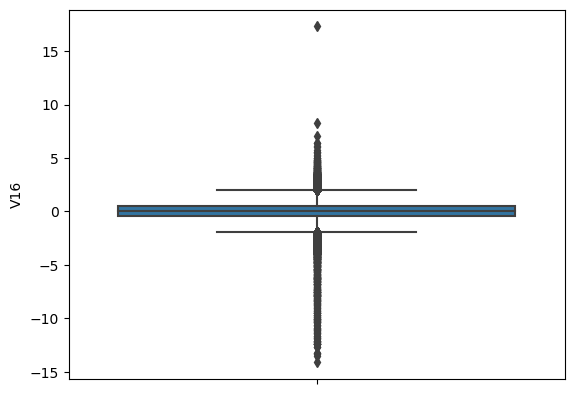

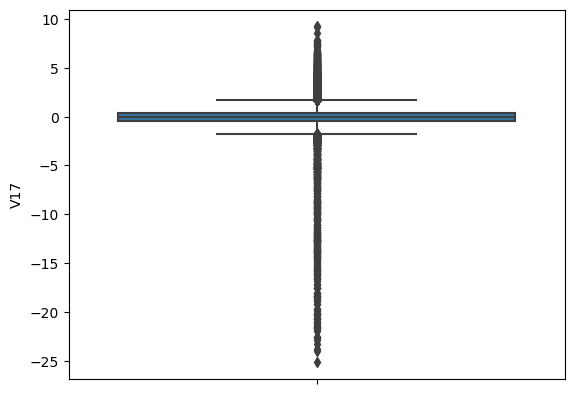

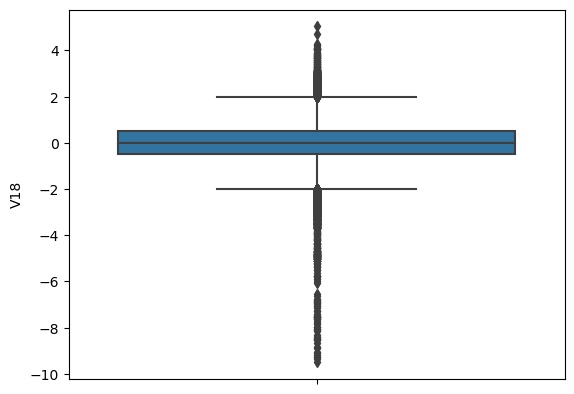

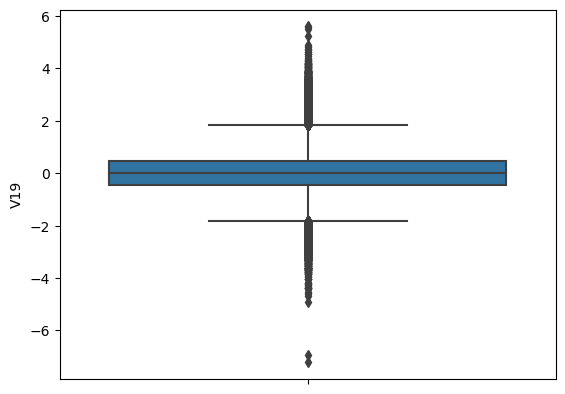

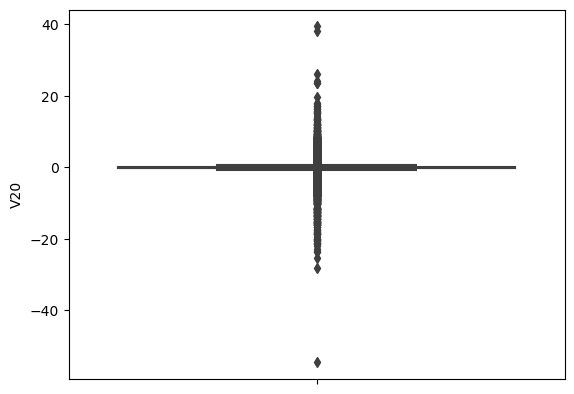

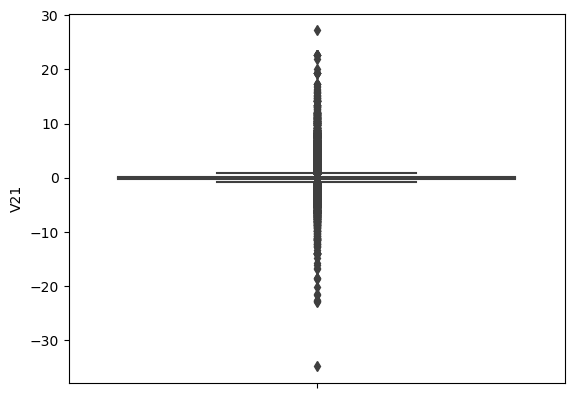

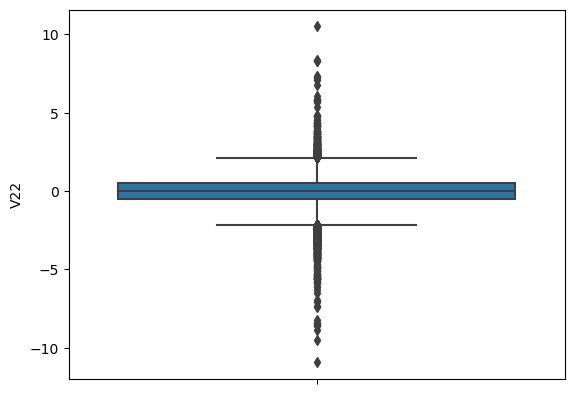

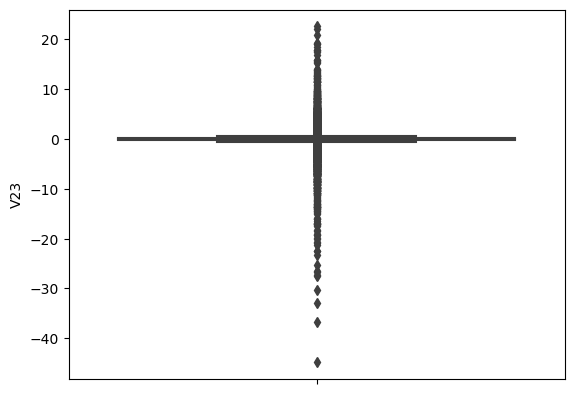

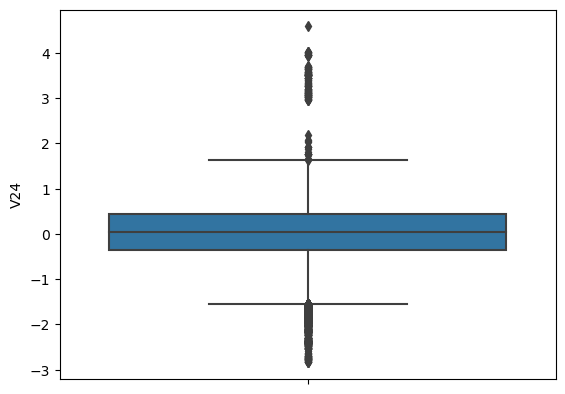

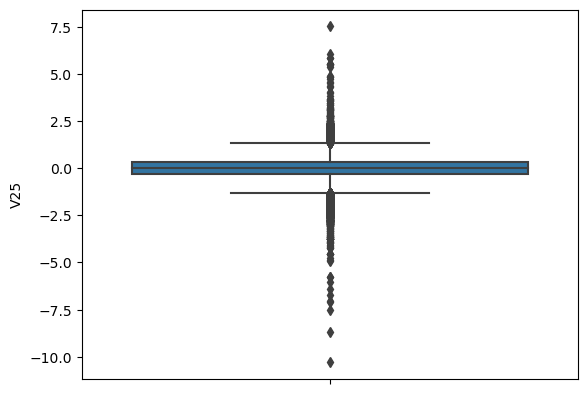

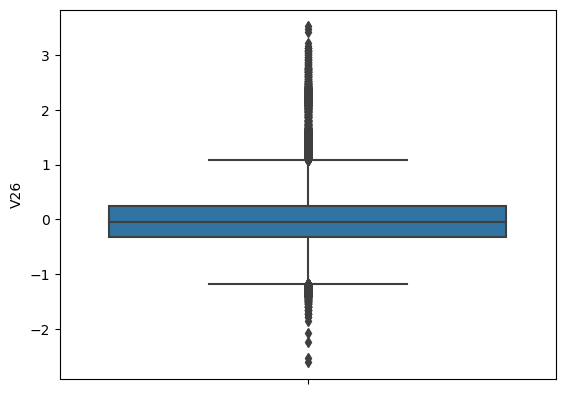

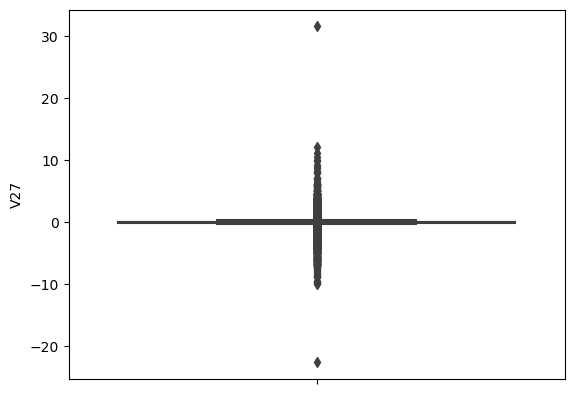

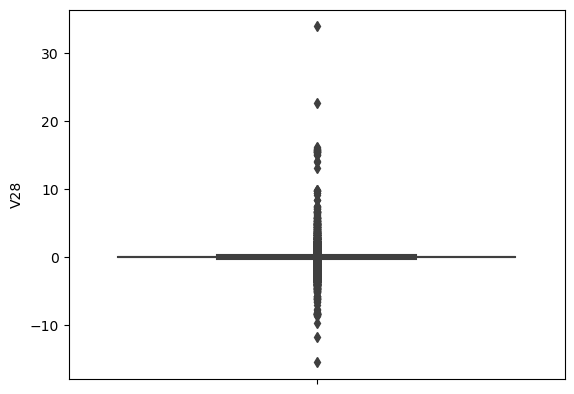

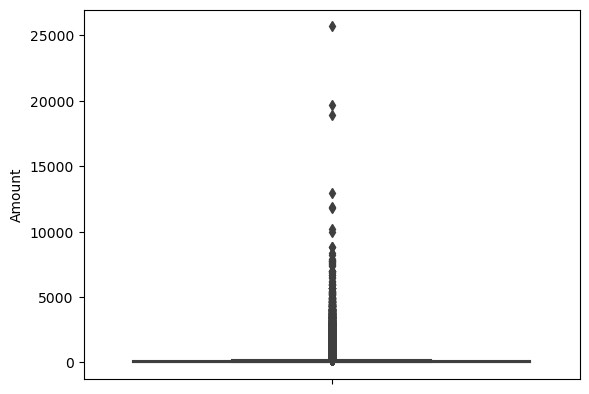

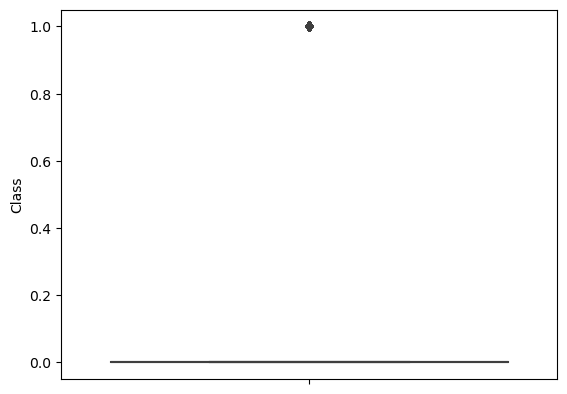

In [12]:
for i in df:
    sns.boxplot(y=df[i])
    plt.show()

### below is the function to remove the outliers

In [13]:
def rem_out(c):
    sorted(c)
    q1,q3=c.quantile([0.25,0.75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [14]:
a = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
for i in a:
    l,u=rem_out(df[i])
    df[i]=np.where(df[i]>u,u,df[i])
    df[i]=np.where(df[i]<l,l,df[i])

### after removal : -

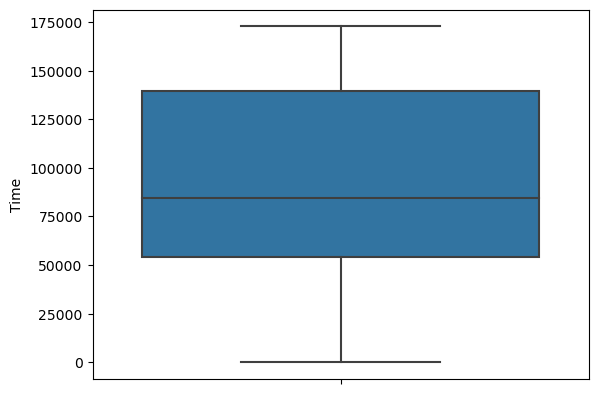

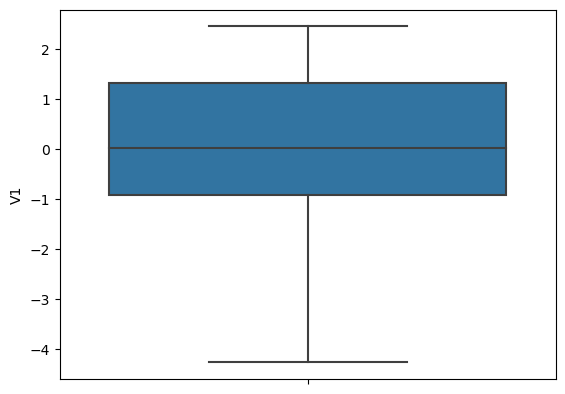

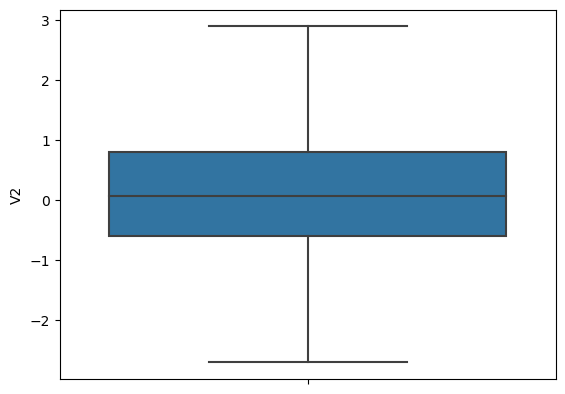

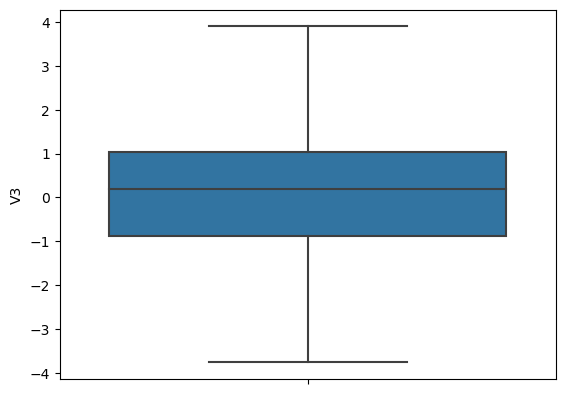

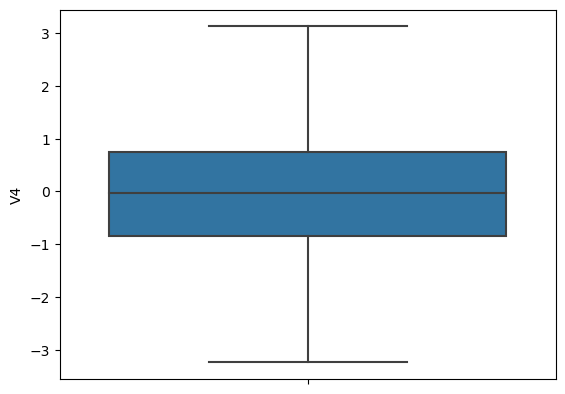

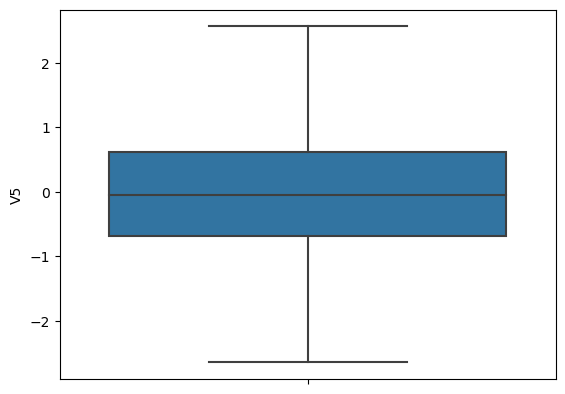

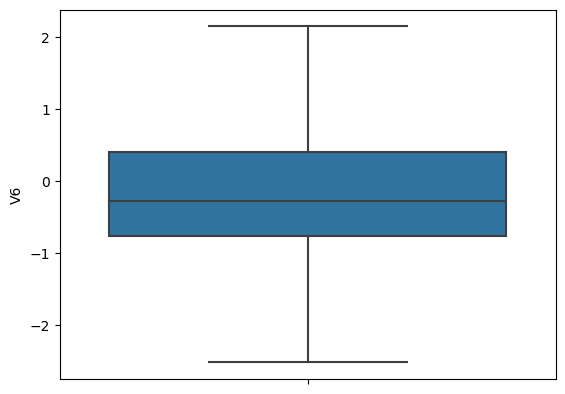

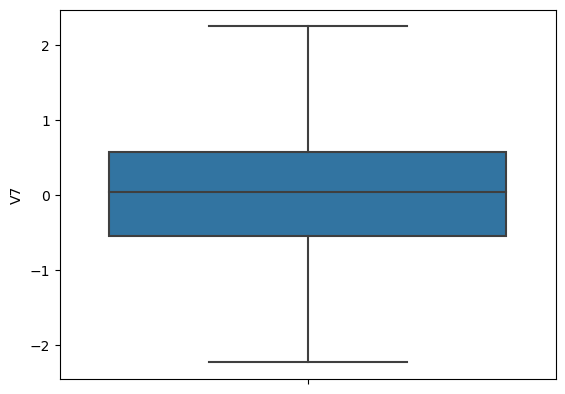

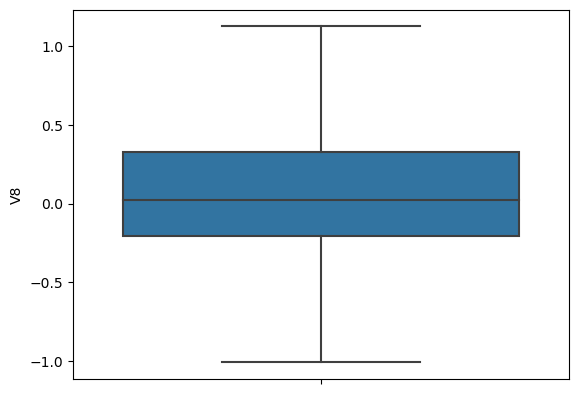

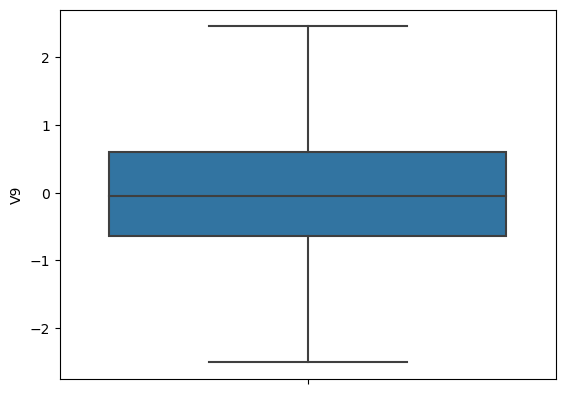

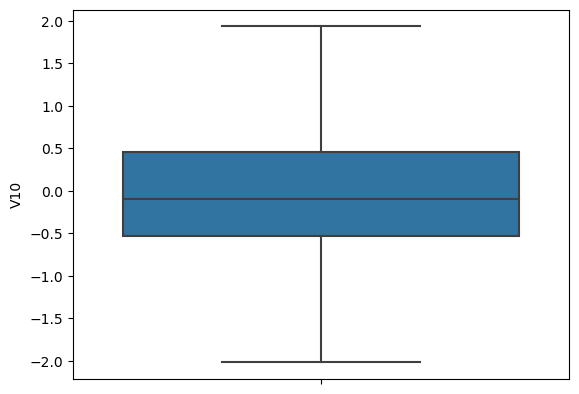

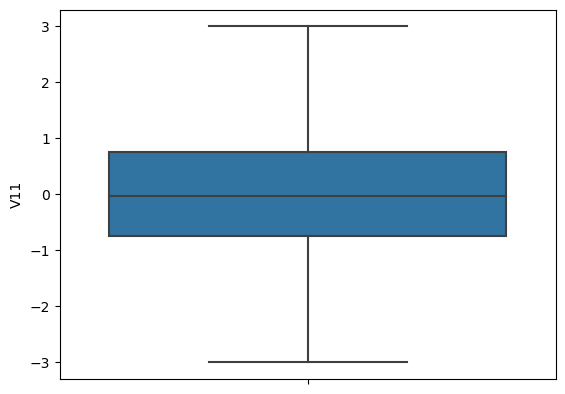

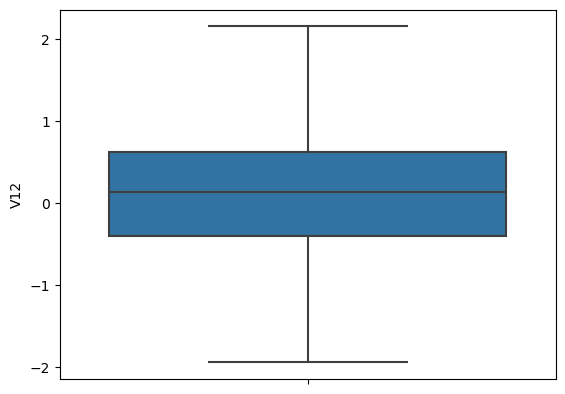

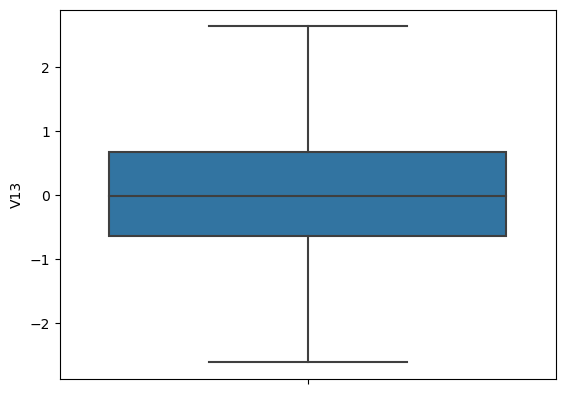

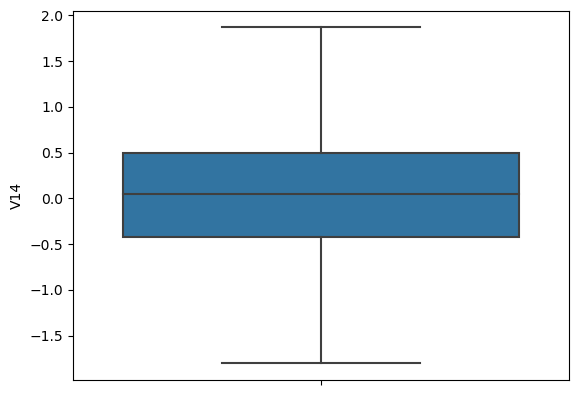

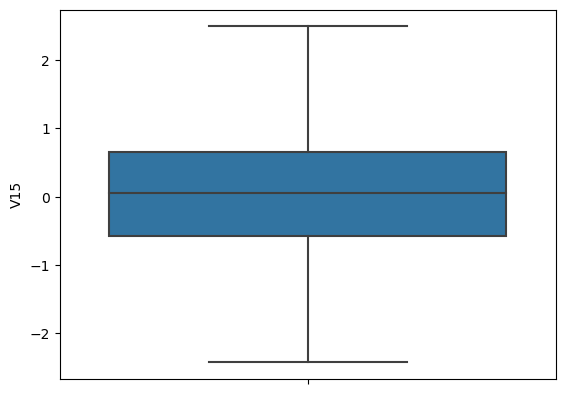

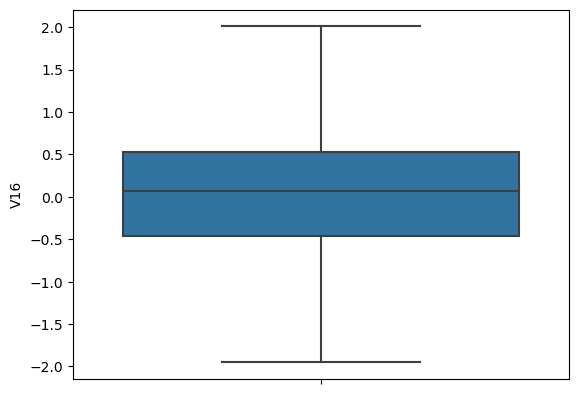

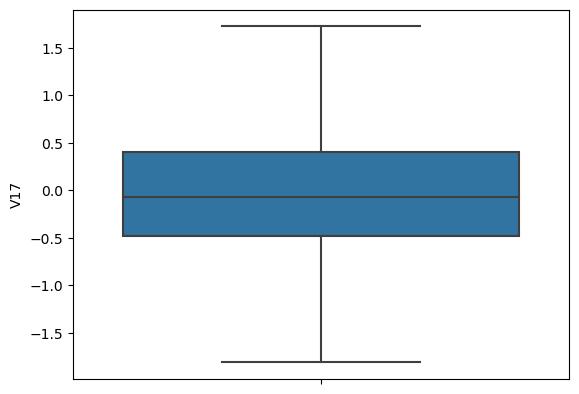

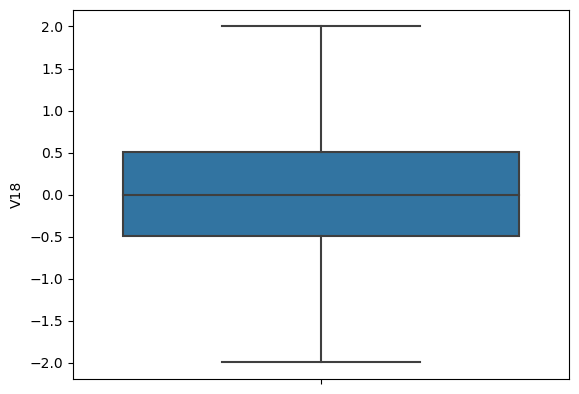

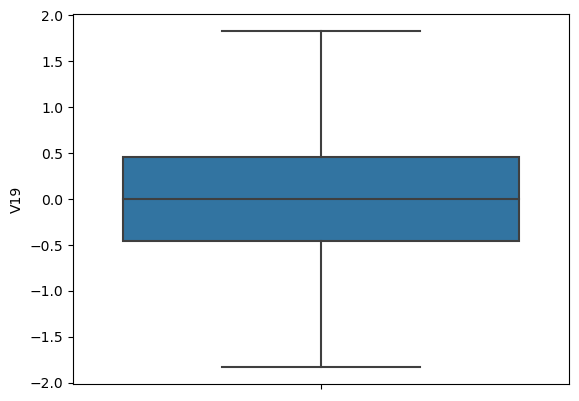

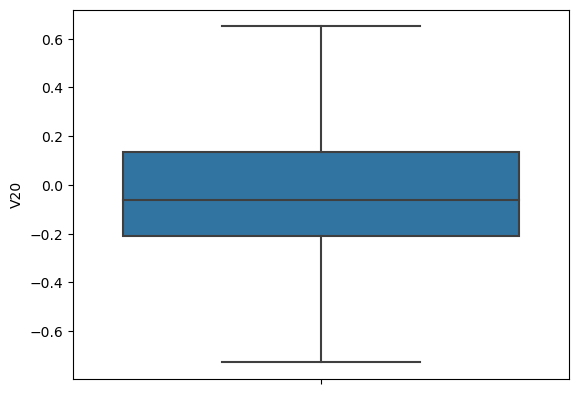

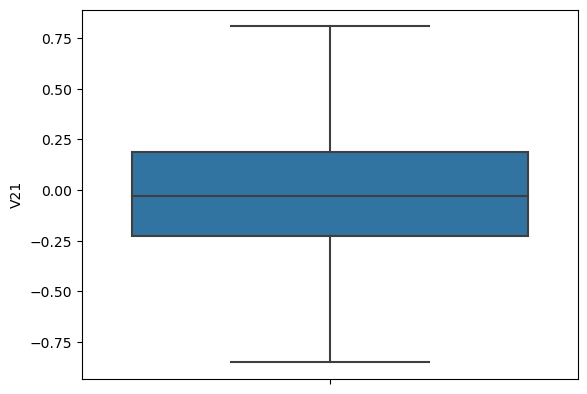

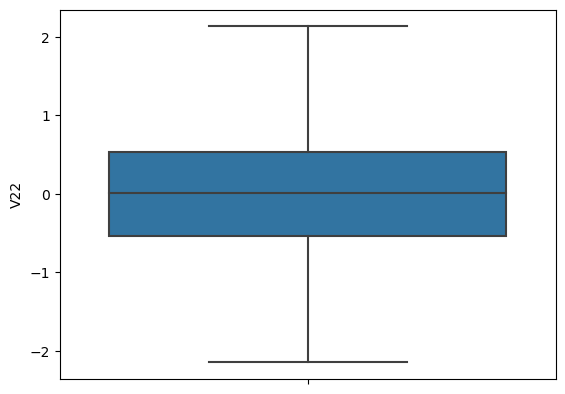

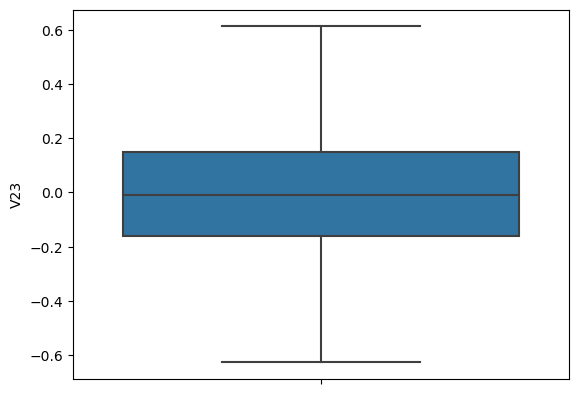

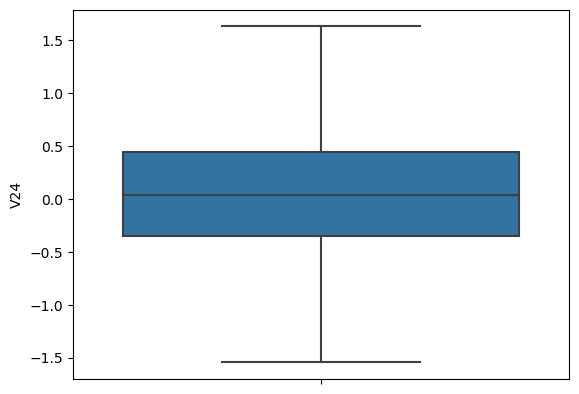

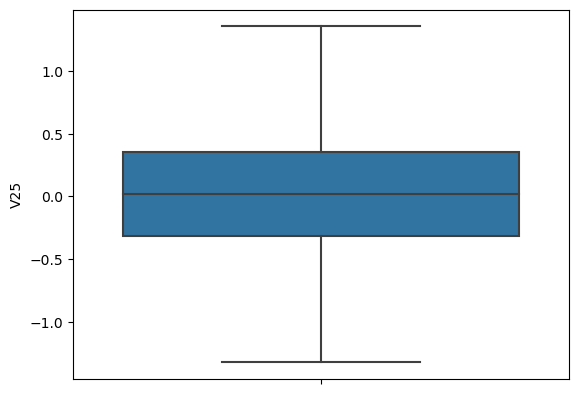

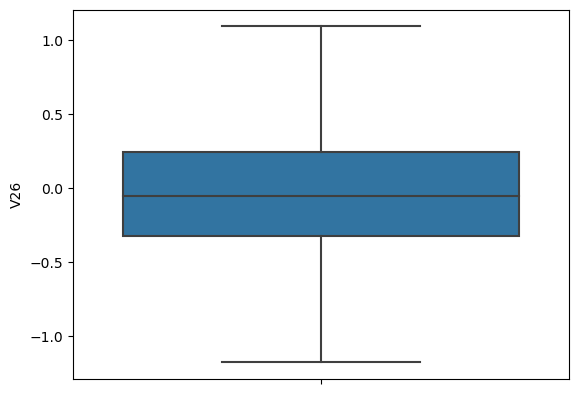

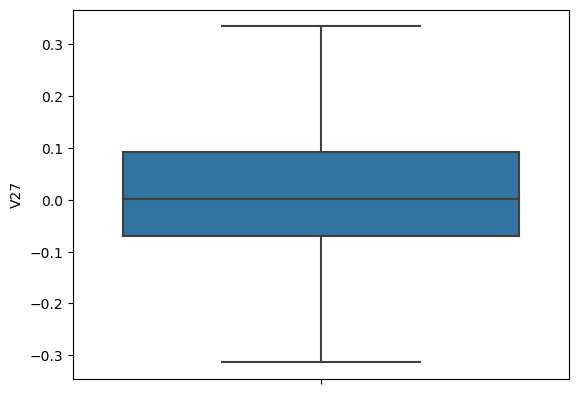

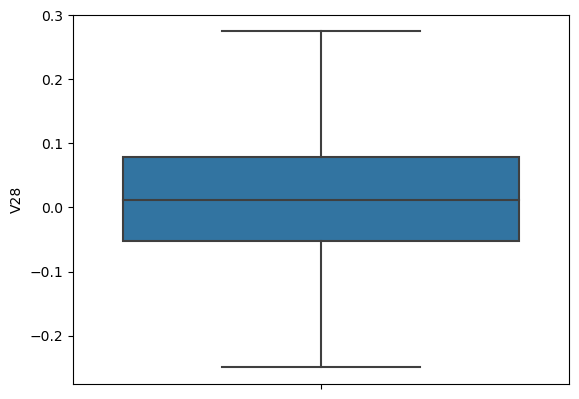

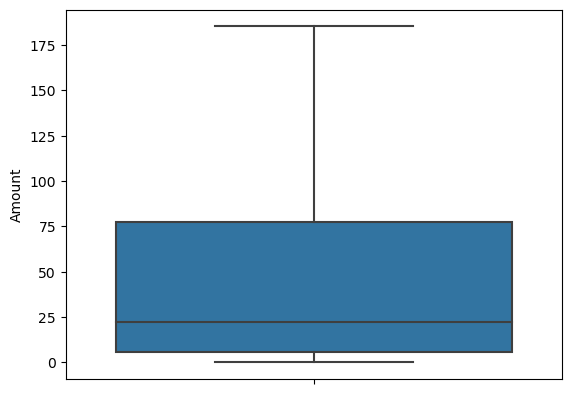

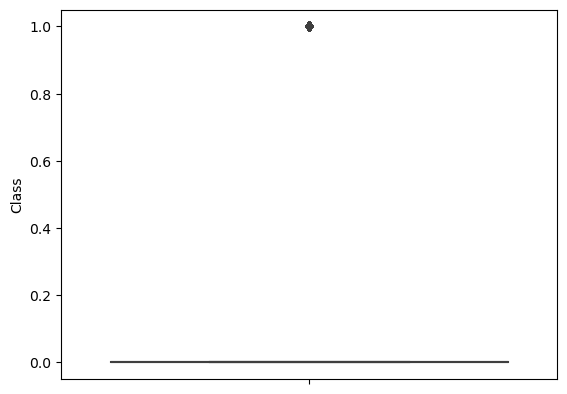

In [15]:
for i in df:
    sns.boxplot(y=df[i])
    plt.show()

Text(0.5, 1.0, 'Class Count')

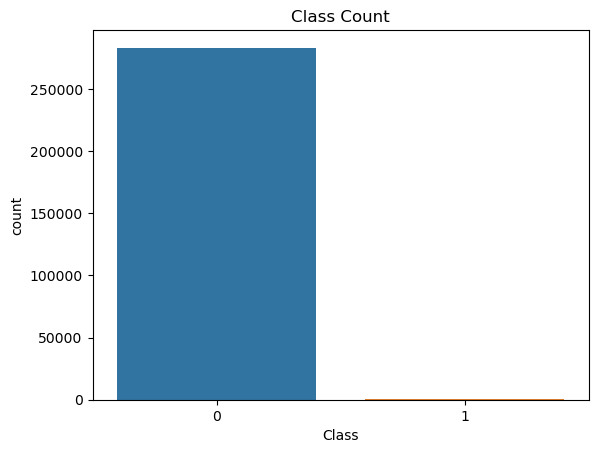

In [16]:
sns.countplot(x='Class', data=df)
plt.title('Class Count')

### In the above plot there are over 250000 '0 - class' (non fraud) cases and 473 '1 - class' (fraud) cases

## Correlation between all the columns

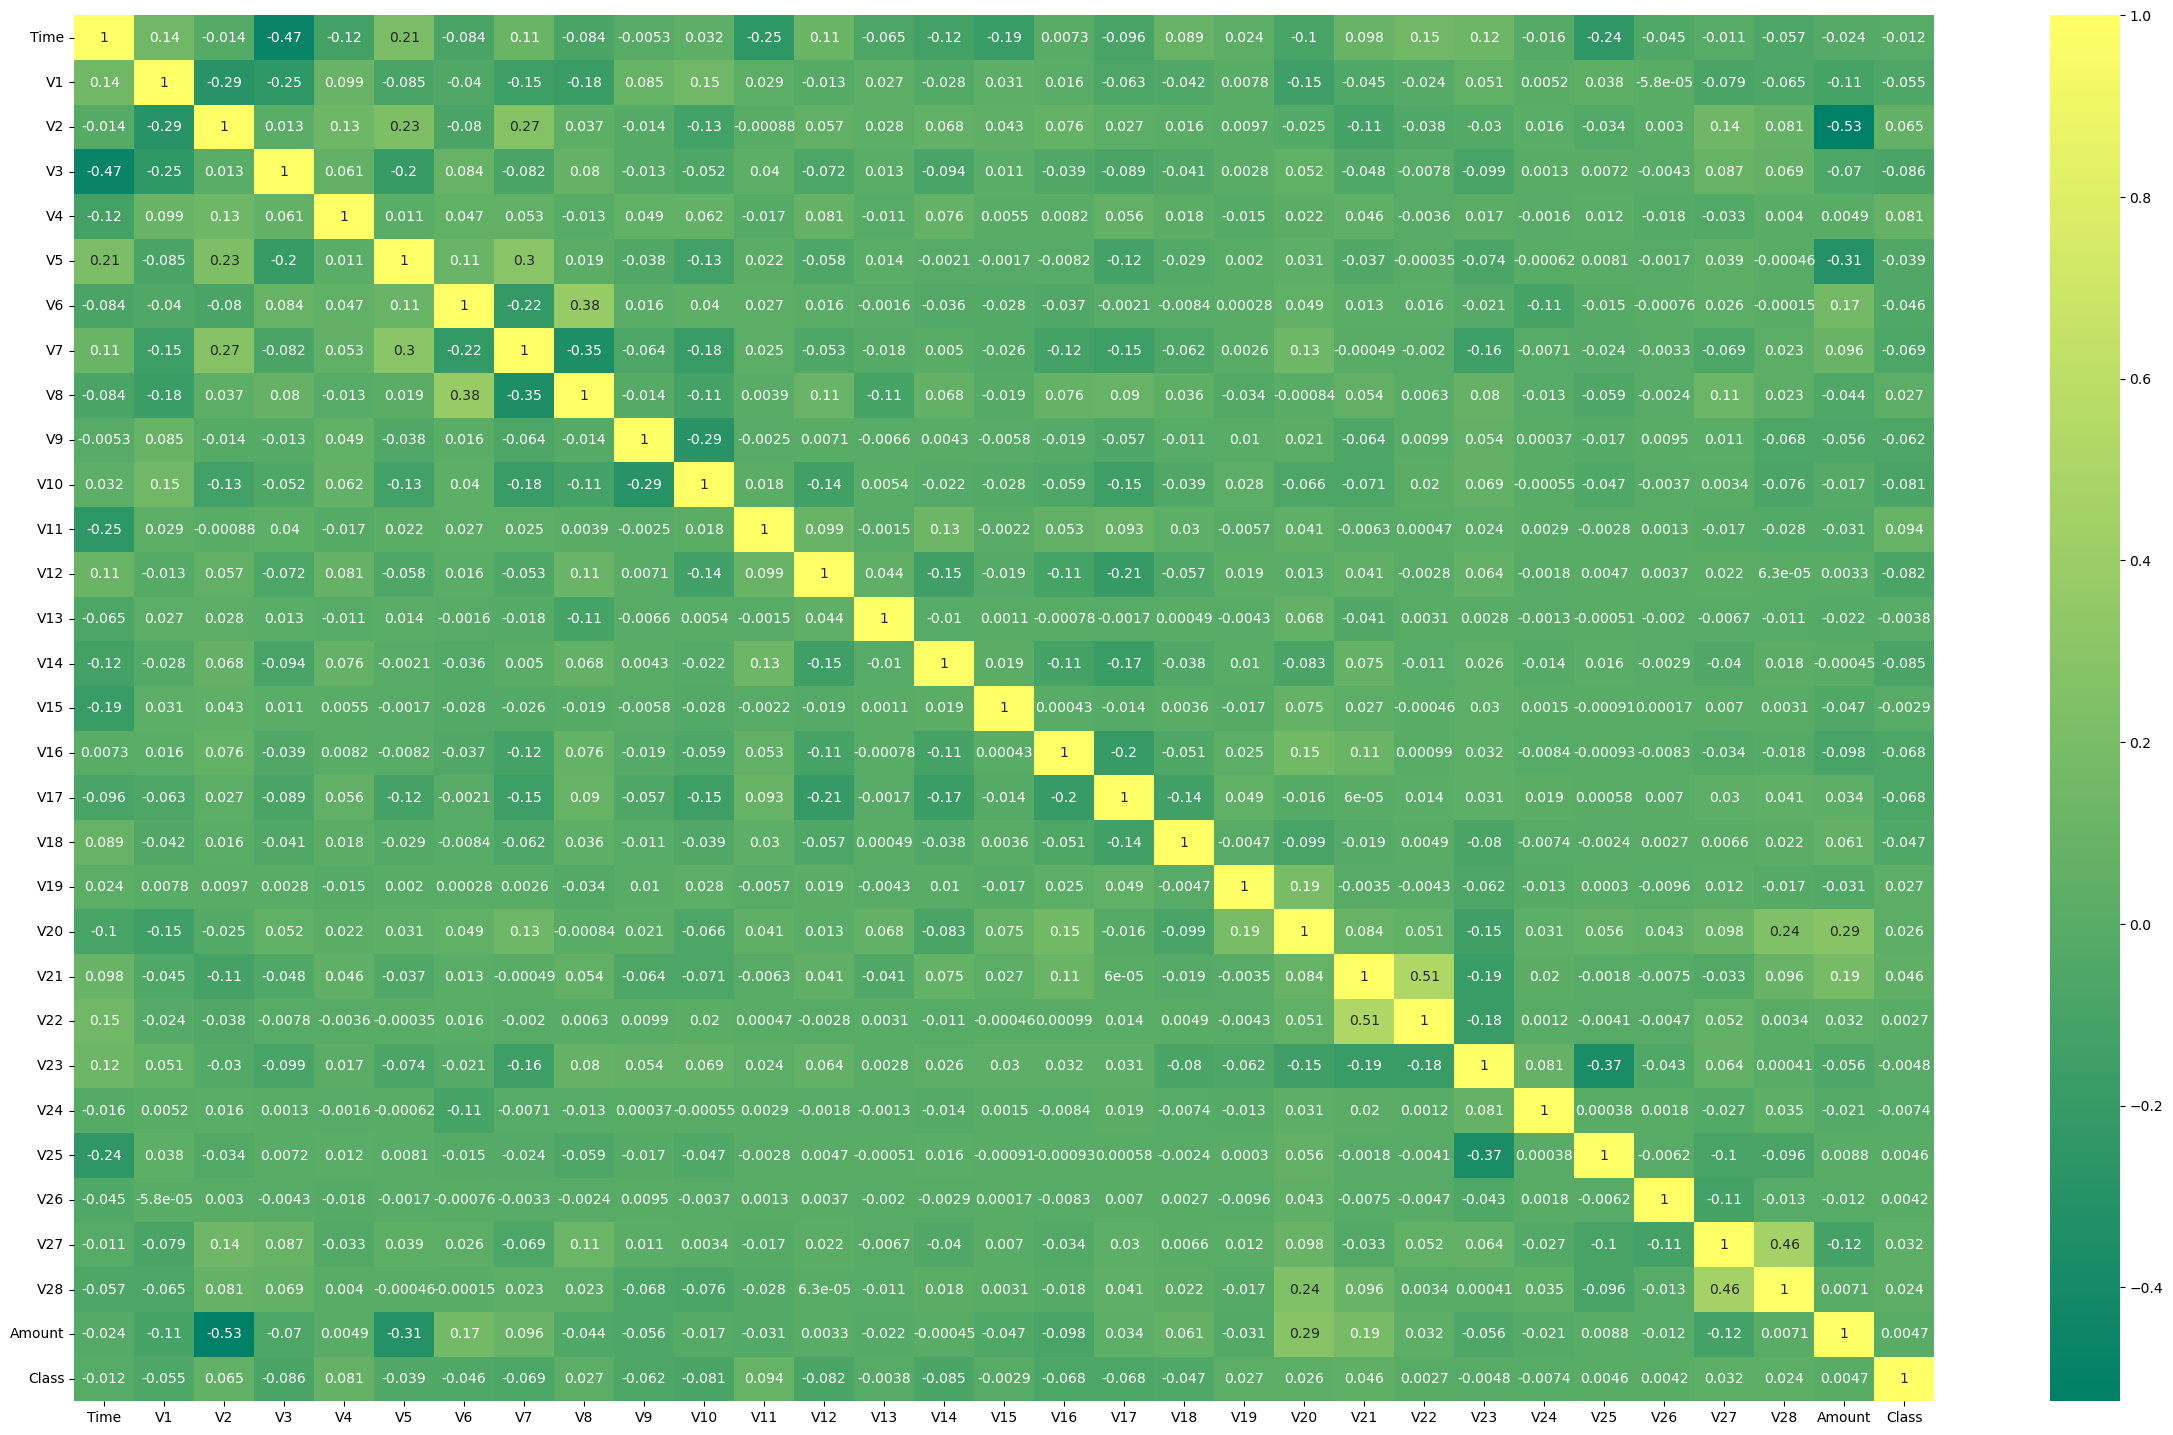

In [17]:
plt.figure(figsize=(30,18))
sns.heatmap(data=df.corr(),cmap='summer',annot=True)
plt.show()

In [18]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [19]:
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [20]:
legit_new = legit.sample(n=473)
df_new = pd.concat([legit_new,fraud],axis=0)

In [21]:
df_new['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

Text(0.5, 1.0, 'Balanced Class count')

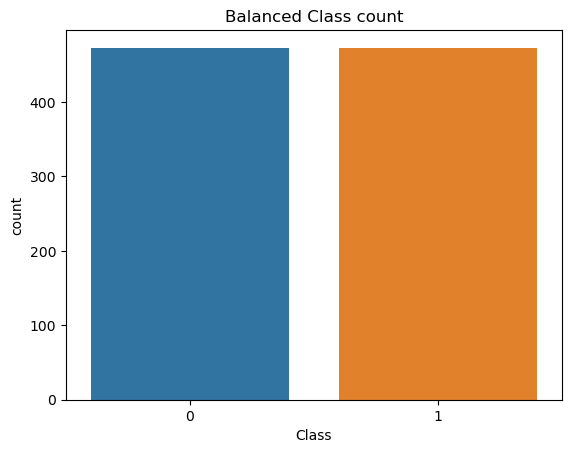

In [22]:
sns.countplot(x='Class', data=df_new)
plt.title('Balanced Class count')

## Train - Test Splitting

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [24]:
x=df_new.drop("Class",axis=1)
y=df_new[["Class"]]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

## Logistic Regression

In [26]:
model_1=LogisticRegression()

In [27]:
model_1.fit(x_train,y_train)
model_1.score(x_train,y_train)

0.9199395770392749

In [28]:
model_1_pred = model_1.predict(x_test)
accuracy_score(y_test,model_1_pred)

0.9119718309859155

## Decision Tree Classifier

In [29]:
model_2 = DecisionTreeClassifier(max_depth=3)

## Random Forest Classifier

In [30]:
model_3 = RandomForestClassifier(n_estimators=50,max_depth=5,random_state=1)

In [31]:
model_3.fit(x_train,y_train)
model_3.score(x_train,y_train)

0.9652567975830816

In [32]:
model_3_pred = model_3.predict(x_test)
accuracy_score(y_test,model_3_pred)

0.9366197183098591

## K Nearest Neighbours

In [33]:
model_4 = KNeighborsClassifier(n_neighbors=3,p=1)

# Representation of the accuracy scores of each model

In [34]:
names = [
    "Logistic Regression",
    "Decision Tree",
    "RandomForest Classifier",
    "K Nearest Neighbours"
]

models = [
    model_1,model_2,model_3,model_4
]

### the below is the function which returns the training and testing scores of all the models

In [35]:
def Score(X_train, y_train, X_test, y_test, names = names, models = models):
    score_df, score_train, score_test = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        score_train.append(model.score(X_train,y_train))
        y_test_pred = model.predict(X_test)
        score_test.append(accuracy_score(y_test, y_test_pred))
    
    score_df["Model"], score_df["Training accuracy"], score_df["Testing accuracy"] = names, score_train, score_test
    return score_df

### The Score function call for printing the training and testing scores of all the models

In [36]:
Score(x_train, y_train, x_test, y_test, names = names, models = models)

,Model,Training accuracy,Testing accuracy
0,Logistic Regression,0.919940,0.911972
1,Decision Tree,0.957704,0.904930
2,RandomForest Classifier,0.965257,0.936620
3,K Nearest Neighbours,0.797583,0.598592


In [37]:
for i in models:
    print(i,i.score(x_train,y_train))
    pred = i.predict(x_test)
    print(accuracy_score(pred,y_test))

LogisticRegression() 0.9199395770392749
0.9119718309859155
DecisionTreeClassifier(max_depth=3) 0.9577039274924471
0.9049295774647887
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1) 0.9652567975830816
0.9366197183098591
KNeighborsClassifier(n_neighbors=3, p=1) 0.797583081570997
0.5985915492957746


## Classification reports of all the models

In [38]:
l = [model_1,model_2,model_3,model_4]
for i in l:
    predictions = i.predict(x_test)
    print(i,"\n")
    print(classification_report(y_test,predictions))
    print("\n")

LogisticRegression() 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       134
           1       0.97      0.86      0.91       150

    accuracy                           0.91       284
   macro avg       0.92      0.92      0.91       284
weighted avg       0.92      0.91      0.91       284



DecisionTreeClassifier(max_depth=3) 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       134
           1       0.95      0.87      0.91       150

    accuracy                           0.90       284
   macro avg       0.91      0.91      0.90       284
weighted avg       0.91      0.90      0.90       284



RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1) 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       134
           1       1.00      0.88      0.94       150

    accuracy                           0.94   

# Visual representation of the accuracy of all models

In [41]:
res = pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest Classifier','K Nearest Neighbours'],
    'Accuracy Score':[0.911972,0.904930,0.936620,0.598592]})
res=res.sort_values('Accuracy Score',ascending=False)
px.line(data_frame=res,x=res['Model'],y=res['Accuracy Score']*100,title='Model Accuracy Score').show()

# Testing on New data 

In [40]:
l = [model_1,model_2,model_3,model_4]
for i in l:
    pipeline = Pipeline(steps=[('s',StandardScaler()), ('m',i)])
    pipeline.fit(x, y)
    print(i)
    print('\nNormal cases:')
    data = [[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62],
     [0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.463917041022171,-0.114804663102346,-0.183361270123994,-0.145783041325259,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69],
     [1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66]]
    for row in data:
     yhat = pipeline.predict_proba([row])
     result = yhat[0][1]
     print('Predicted=%.3f (expected 0)' % (result))

    print('Fraud cases:')
    data = [[406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0],
     [7519,1.23423504613468,3.0197404207034,-4.30459688479665,4.73279513041887,3.62420083055386,-1.35774566315358,1.71344498787235,-0.496358487073991,-1.28285782036322,-2.44746925511151,2.10134386504854,-4.6096283906446,1.46437762476188,-6.07933719308005,-0.339237372732577,2.58185095378146,6.73938438478335,3.04249317830411,-2.72185312222835,0.00906083639534526,-0.37906830709218,-0.704181032215427,-0.656804756348389,-1.63265295692929,1.48890144838237,0.566797273468934,-0.0100162234965625,0.146792734916988,1],
     [7526,0.00843036489558254,4.13783683497998,-6.24069657194744,6.6757321631344,0.768307024571449,-3.35305954788994,-1.63173467271809,0.15461244822474,-2.79589246446281,-6.18789062970647,5.66439470857116,-9.85448482287037,-0.306166658250084,-10.6911962118171,-0.638498192673322,-2.04197379107768,-1.12905587703585,0.116452521226364,-1.93466573889727,0.488378221134715,0.36451420978479,-0.608057133838703,-0.539527941820093,0.128939982991813,1.48848121006868,0.50796267782385,0.735821636119662,0.513573740679437,1]]
    for row in data:
     yhat = pipeline.predict_proba([row])
     result = yhat[0][1]
     print('Predicted=%.3f (expected 1)' % (result))
    print('\n')

LogisticRegression()

Normal cases:
Predicted=0.147 (expected 0)
Predicted=0.025 (expected 0)
Predicted=0.239 (expected 0)
Fraud cases:
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)


DecisionTreeClassifier(max_depth=3)

Normal cases:
Predicted=0.066 (expected 0)
Predicted=0.066 (expected 0)
Predicted=0.066 (expected 0)
Fraud cases:
Predicted=0.993 (expected 1)
Predicted=0.993 (expected 1)
Predicted=0.993 (expected 1)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)

Normal cases:
Predicted=0.082 (expected 0)
Predicted=0.045 (expected 0)
Predicted=0.198 (expected 0)
Fraud cases:
Predicted=0.989 (expected 1)
Predicted=0.995 (expected 1)
Predicted=1.000 (expected 1)


KNeighborsClassifier(n_neighbors=3, p=1)

Normal cases:
Predicted=0.000 (expected 0)
Predicted=0.000 (expected 0)
Predicted=0.333 (expected 0)
Fraud cases:
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)
Predicted=1.000 (expected 1)




## CONCLUSION:

### => From the above we came to know that overall predictions of all the models were very good but Logistic    Regression and KNN were best at it since they were predicting the fraud cases exactly as there were needed to be predicted. 
### => If we look at both normal and fraud cases then KNN is best at predicting more accurate results for both normal and fraud cases.